<a href="https://colab.research.google.com/github/rg-smith/remote_sensing_course/blob/main/lectures/lecture5/ndvi_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/rg-smith/remote_sensing_course.git

Cloning into 'remote_sensing_course'...
remote: Enumerating objects: 355, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 355 (delta 50), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (355/355), 97.85 MiB | 16.32 MiB/s, done.
Resolving deltas: 100% (113/113), done.
Checking out files: 100% (38/38), done.


In [2]:
# plotting a time series
import gdal
import os
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from datetime import datetime

plt.rcParams['figure.figsize'] = [20, 12]

In [3]:
def load_raster(fname,band=1):
    ds=gdal.Open(fname)
    band=ds.GetRasterBand(band)
    data=band.ReadAsArray()
    return(data,ds)

In [4]:
# load modis data
os.chdir('/content/remote_sensing_course/rasters')
files=glob('*.tif')
print(files)

['srtm_2km.tif', 'Rolla_l8B5_Jan2021.tif', 'MODIS_band1.tif', 'Rolla_srtm.tif', 'MODIS_band2.tif']


In [5]:
modis1,_=load_raster('MODIS_band1.tif')
modis2,_=load_raster('MODIS_band2.tif')
elev,_=load_raster('srtm_2km.tif')
print(modis1.shape)

(1517, 3938)


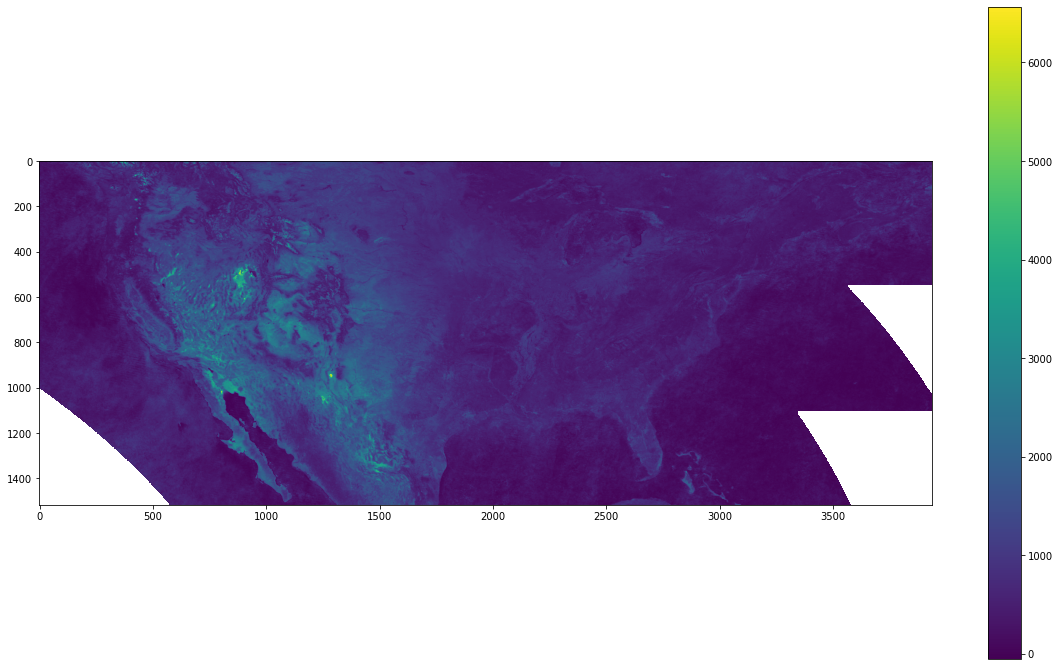

In [6]:
plt.figure();plt.imshow(modis1);plt.colorbar()

In [7]:
ndvi=(modis2-modis1)/(modis2+modis1)

ndvi[ndvi>1]=np.nan;
ndvi[ndvi<-1]=np.nan;

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


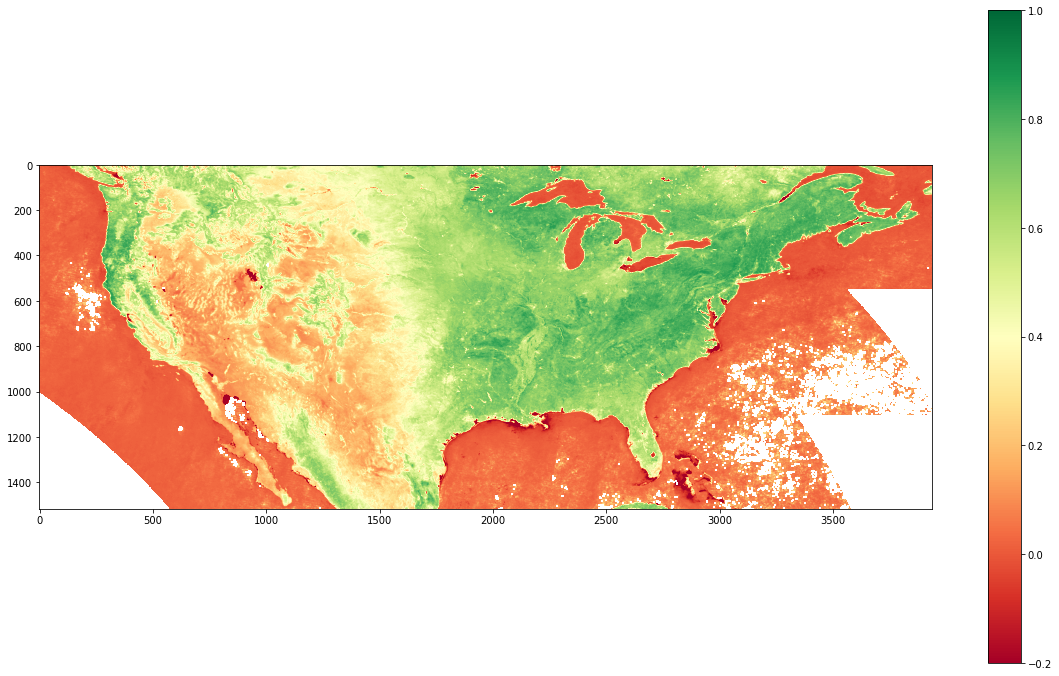

In [8]:
plt.figure();plt.imshow(ndvi,cmap='RdYlGn',vmin=-0.2,vmax=1);plt.colorbar()

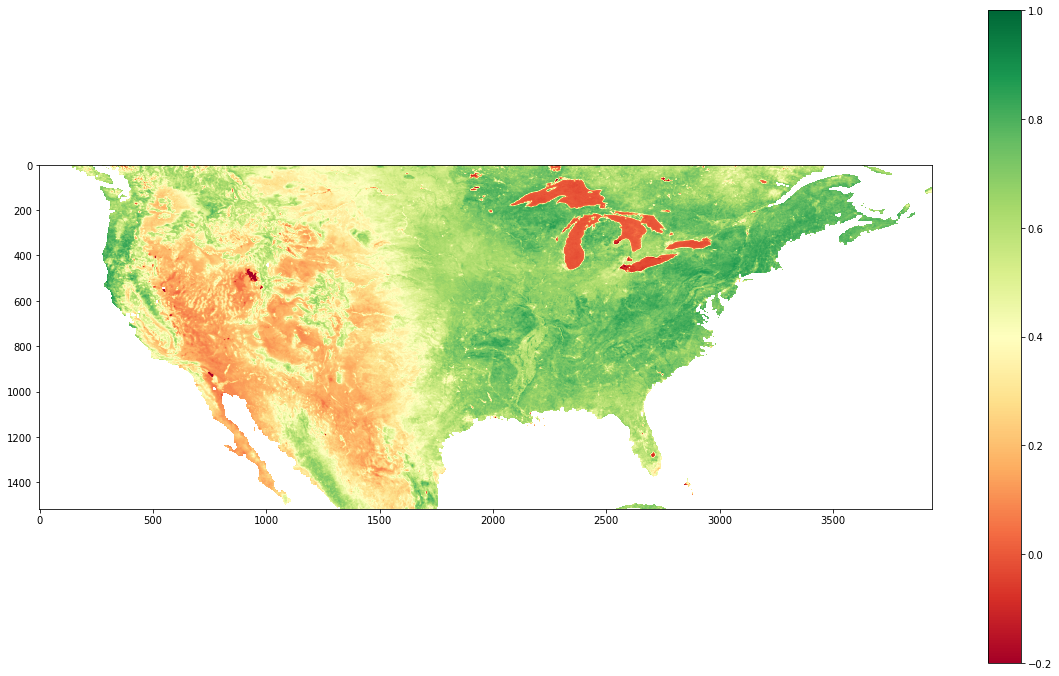

In [9]:
ndvi[elev==0]=np.nan;

plt.figure();plt.imshow(ndvi,cmap='RdYlGn',vmin=-0.2,vmax=1);plt.colorbar()

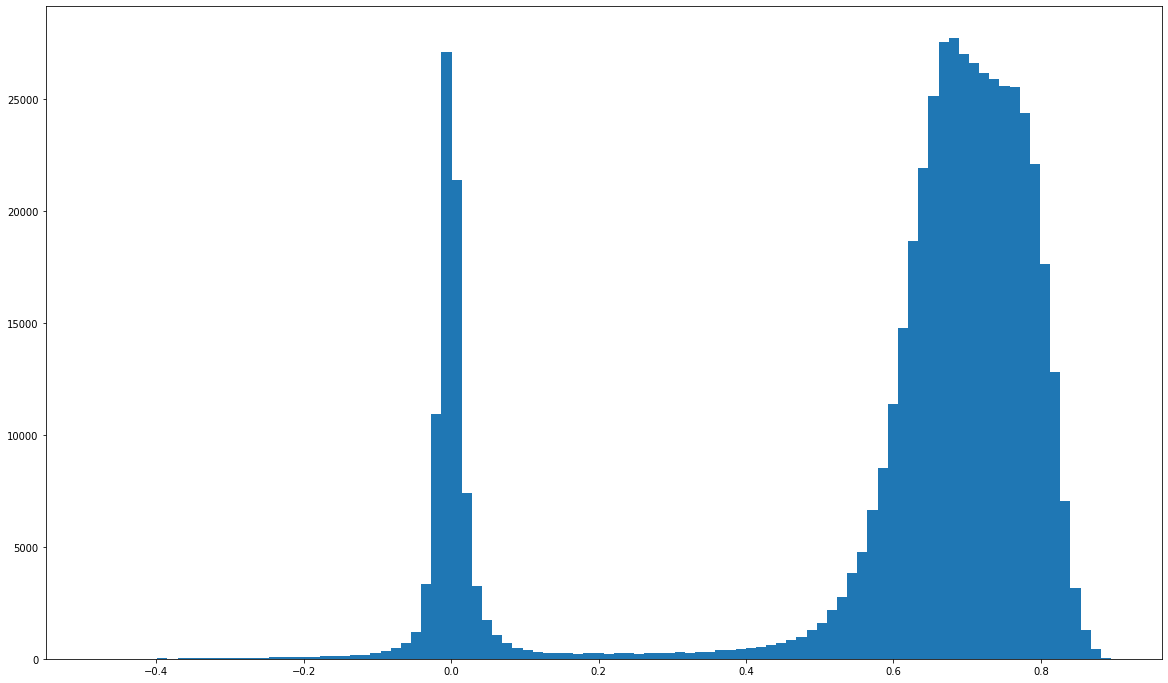

In [10]:
plt.figure();
fig=plt.hist(np.ndarray.flatten(ndvi[36:580,2050:3000]),bins=100)